In [1]:
#!pip install simpy

In [2]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class JusticeSystem():
    def __init__(self, env) -> None:
        self.env = env
        
        # Initialisation
        self.active_cases = 20
        self.magistrate_cases = 10
        self.crown_cases = 10

        # List for logging
        self.active_list = []
        self.magistrate_list = []
        self.crown_list = []

    # The entire justice process
    def justice(self, env):
        while True:
            # Influx of cases
            self.active_cases += max(0, np.random.normal(5, 0.4))

            # State at the beginning of the day
            print(f'At the beginning of day {env.now}, the number of active cases is {round(self.active_cases,2)}k cases, cases in magistrate backlog is {round(self.magistrate_cases,2)}k cases, cases in crown court backlog is {round(self.crown_cases,2)}k cases.')
            
            # For logging
            self.active_list.append(round(self.active_cases,2))
            self.magistrate_list.append(round(self.magistrate_cases,2))
            self.crown_list.append(round(self.crown_cases,2))

            if self.active_cases > 0:
                yield self.env.process(self.summoned())

            if self.magistrate_cases > 0:
                yield self.env.process(self.magistrate()) 
            
            if self.crown_cases > 0:
                yield self.env.process(self.crown())
            
            yield self.env.timeout(1)

    # The summoned process
    def summoned(self):
        # Cases dismissed
        temp = min(self.active_cases, max(0, np.random.normal(2.5, 0.4)))
        self.active_cases -= temp
        yield self.env.timeout(0)
        
        # Cases moved to magistrate
        temp = min(self.active_cases, max(0, np.random.normal(2.5, 0.4)))
        self.magistrate_cases += temp
        yield self.env.timeout(0) 

    # The magistrate process
    def magistrate(self):
        # Cases dismissed
        temp = min(self.magistrate_cases, max(0, np.random.normal(0.5, 0.4)))            
        self.magistrate_cases -= temp
        self.active_cases -= temp
        yield self.env.timeout(0)    

        # Cases sentenced
        temp = min(self.magistrate_cases, max(0, np.random.normal(0.5, 0.4)))
        self.magistrate_cases -= temp
        self.active_cases -= temp
        yield self.env.timeout(0)

        # Cases moved to crown court
        temp = min(self.magistrate_cases, max(0, np.random.normal(1.5, 0.4)))
        self.magistrate_cases -= temp
        self.crown_cases += temp
        yield self.env.timeout(0)

    # the crown process
    def crown(self):
        # Cases dismissed
        temp = min(self.crown_cases, max(0, np.random.normal(0.5, 0.4)))         
        self.crown_cases -= temp
        self.active_cases -= temp
        yield self.env.timeout(0)    

        # Cases sentenced
        temp = min(self.crown_cases, max(0, np.random.normal(1, 0.4)))  
        self.crown_cases -= temp
        self.active_cases -= temp
        yield self.env.timeout(0)


In [4]:
def simulate(env):
    global justice_system
    justice_system = JusticeSystem(env)
    env.process(justice_system.justice(env)) #Add process `summoned` to the simpy env
    
    yield env.timeout(0)

In [5]:
env = simpy.Environment()
env.process(simulate(env)) # Add process `simulate` to the simpy env
env.run(until=100)

At the beginning of day 0, the number of active cases is 24.82k cases, cases in magistrate backlog is 10k cases, cases in crown court backlog is 10k cases.
At the beginning of day 1, the number of active cases is 24.76k cases, cases in magistrate backlog is 10.59k cases, cases in crown court backlog is 9.86k cases.
At the beginning of day 2, the number of active cases is 25.24k cases, cases in magistrate backlog is 11.18k cases, cases in crown court backlog is 10.22k cases.
At the beginning of day 3, the number of active cases is 26.06k cases, cases in magistrate backlog is 11.62k cases, cases in crown court backlog is 10.43k cases.
At the beginning of day 4, the number of active cases is 27.23k cases, cases in magistrate backlog is 11.03k cases, cases in crown court backlog is 11.59k cases.
At the beginning of day 5, the number of active cases is 28.19k cases, cases in magistrate backlog is 11.27k cases, cases in crown court backlog is 11.85k cases.
At the beginning of day 6, the numb

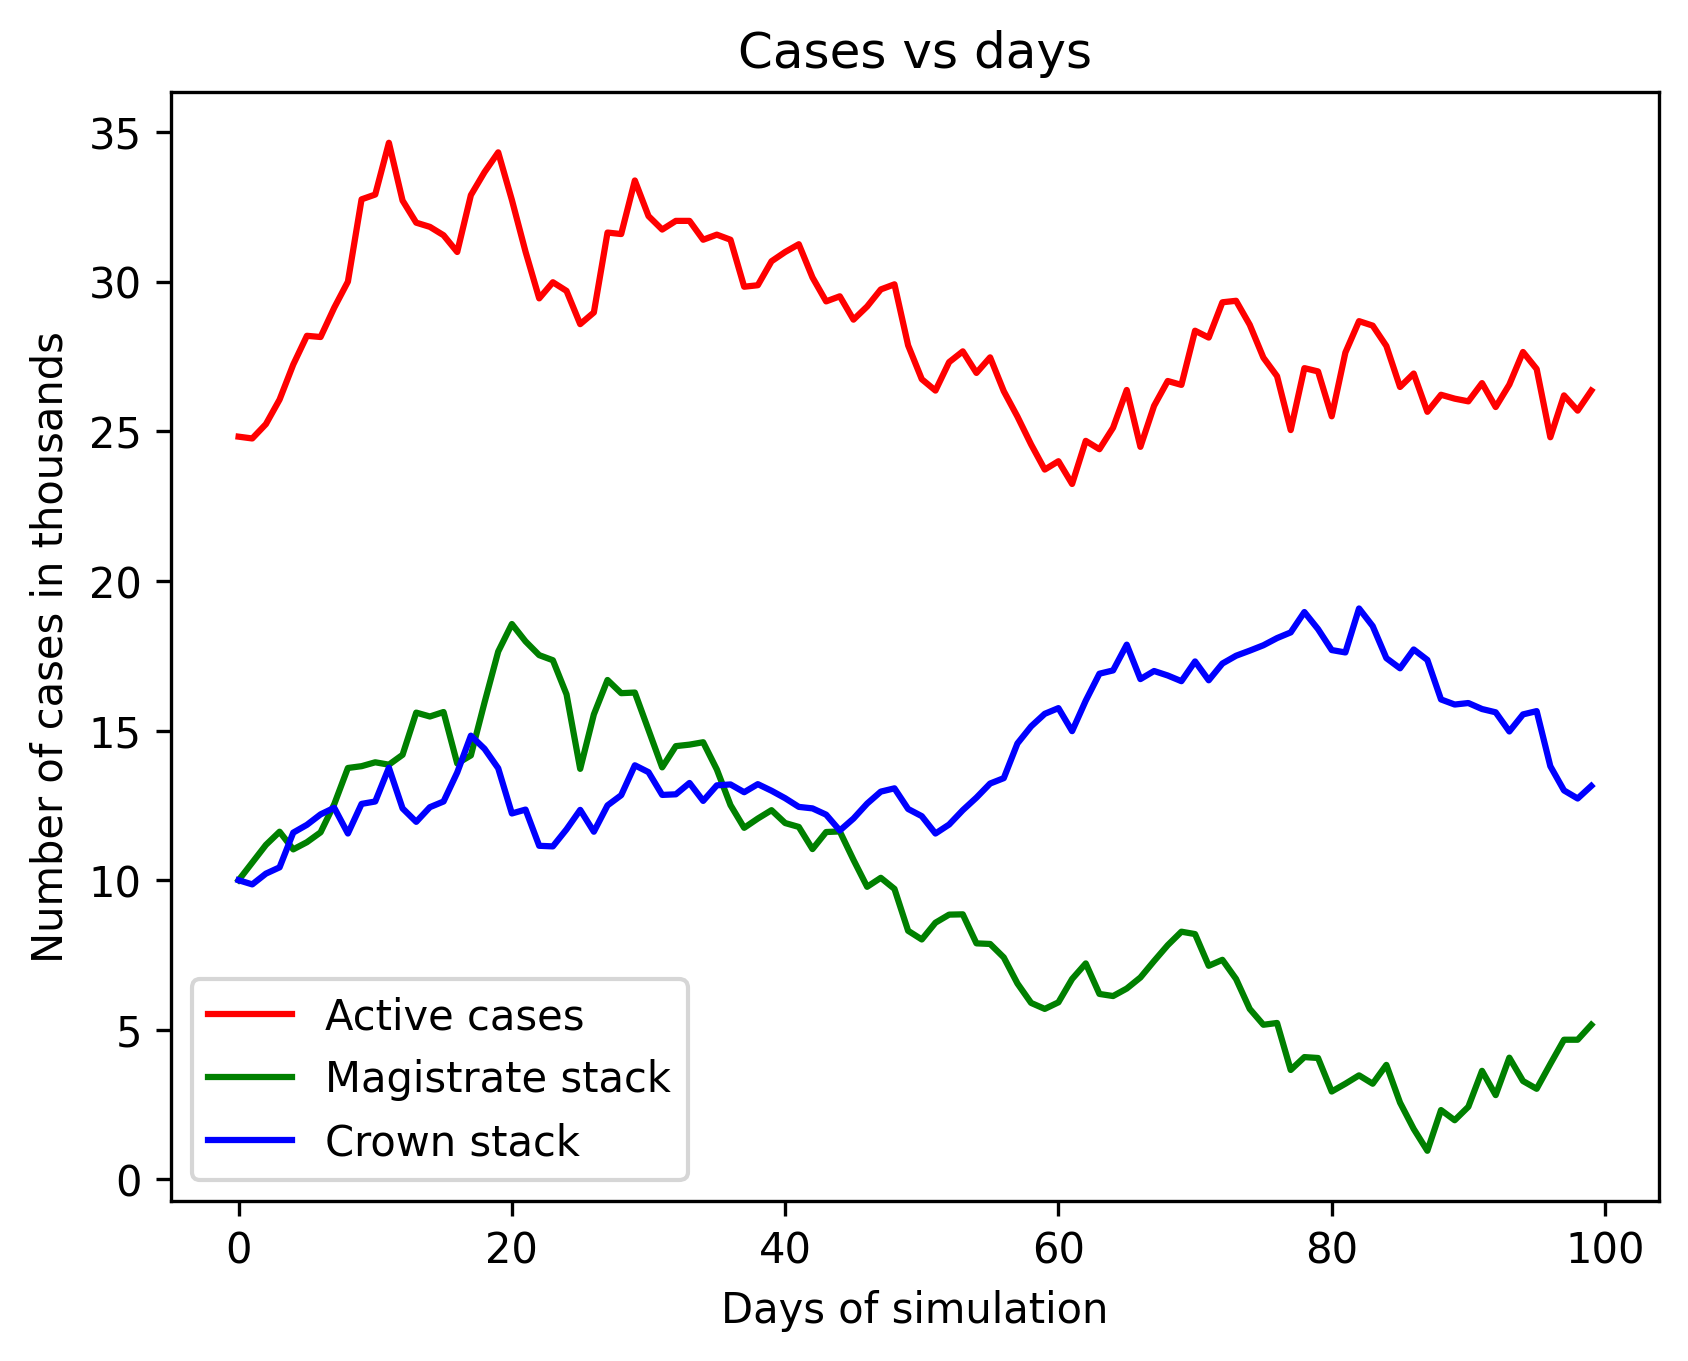

In [6]:
# Plotting the number of active cases
plt.rcParams['figure.dpi'] = 300

# Plotting the data on the same graph
plt.plot(justice_system.active_list, color='r', label='Active cases')
plt.plot(justice_system.magistrate_list, color='g', label='Magistrate stack')
plt.plot(justice_system.crown_list, color='b', label='Crown stack')

# Adding labels to the axes
plt.xlabel('Days of simulation')
plt.ylabel('Number of cases in thousands')

# Adding a title to the plot
plt.title('Cases vs days')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
